In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [8]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
# converting 2d y_train and y_test into 1d array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X, y, index):
  plt.figure(figsize= (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

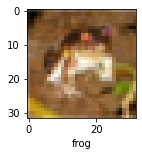

In [12]:
plot_sample(X_train, y_train, 0)

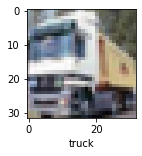

In [15]:
plot_sample(X_train, y_train, 1)

Normalizing the training data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**ANN model for image classification**

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")
])

ann.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 187s 119ms/step - loss: 1.8820 - accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 203s 130ms/step - loss: 1.6513 - accuracy: 0.4060
Epoch 3/10
1563/1563 [==============================] - 240s 154ms/step - loss: 1.5720 - accuracy: 0.4369
Epoch 4/10
1563/1563 [==============================] - 215s 138ms/step - loss: 1.5226 - accuracy: 0.4545
Epoch 5/10
1563/1563 [==============================] - 188s 120ms/step - loss: 1.4859 - accuracy: 0.4667
Epoch 6/10
1563/1563 [==============================] - 204s 130ms/step - loss: 1.4521 - accuracy: 0.4796
Epoch 7/10
1563/1563 [==============================] - 191s 122ms/step - loss: 1.4292 - accuracy: 0.4898
Epoch 8/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.3997 - accuracy: 0.4983
Epoch 9/10
1563/1563 [==============================] - 228s 146ms/step - loss: 1.3777 - accuracy: 0.5085
Epoch 10/10
1563/1563 [=======================

We can see using ANN at the end of 10 epochs we are getting an accuracy of around

In [20]:
from sklearn.metrics import classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report : \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 31ms/step
Classification Report : 
               precision    recall  f1-score   support

           0       0.60      0.49      0.54      1000
           1       0.58      0.59      0.58      1000
           2       0.40      0.34      0.37      1000
           3       0.41      0.18      0.25      1000
           4       0.37      0.42      0.39      1000
           5       0.39      0.41      0.40      1000
           6       0.54      0.45      0.49      1000
           7       0.41      0.69      0.52      1000
           8       0.57      0.65      0.61      1000
           9       0.52      0.53      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



Text(69.0, 0.5, 'Truth')

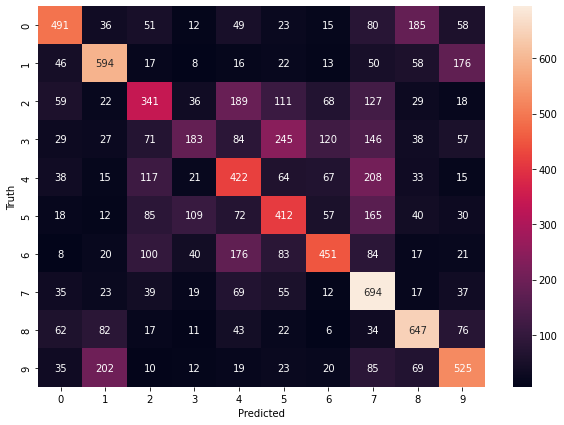

In [21]:
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_classes)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**CNN model for Image Classification**

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(
    optimizer= "adam",
    loss= "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4381 - accuracy: 0.4816
Epoch 2/10
1563/1563 [==============================] - 78s 50ms/step - loss: 1.0959 - accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9614 - accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8731 - accuracy: 0.6981
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8057 - accuracy: 0.7210
Epoch 6/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7429 - accuracy: 0.7436
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.6949 - accuracy: 0.7611
Epoch 8/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6460 - accuracy: 0.7759
Epoch 9/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.5998 - accuracy: 0.7906
Epoch 10/10
1563/1563 [==============================] - 77s 49m

We can see using cnn at the end of 10 epochs, we are getting an accuracy of around which is significant improvement over ANN.

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9453 - accuracy: 0.7004


[0.9452909231185913, 0.7003999948501587]

In [24]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("CNN prediction =", y_pred_classes[:10])
print("Actual results =", y_test[:10])

313/313 [==============================] - 5s 15ms/step
CNN prediction = [3, 8, 8, 0, 4, 6, 1, 6, 3, 1]
Actual results = [3 8 8 0 6 6 1 6 3 1]


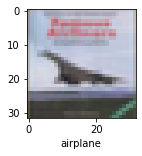

In [25]:
plot_sample(X_test, y_test, 3)

In [26]:
classes[y_pred_classes[3]]

'airplane'

Text(69.0, 0.5, 'Truth')

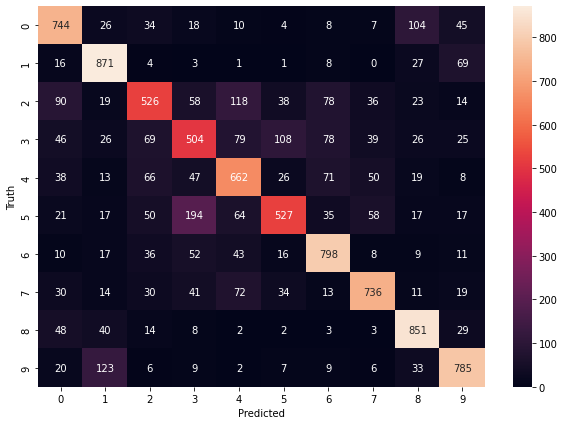

In [27]:
cm = tf.math.confusion_matrix(labels= y_test, predictions=y_pred_classes)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot= True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")